## **VISÃO COMPUTACIONAL - AULA 06**

**Objetivos da aula:**

*   conhecer o problema de detecção de contorno em imagens
*   conhecer e patricar com métodos baseados em variação de função
*   conhecer e patricar com métodos baseados em variação de derivada primeira de função
*   conhecer e patricar com métodos baseados em variação de derivada segunda de função










## **DETECÇÃO DE CONTORNOS (BORDOS)**

Um **contorno** ou **bordo** de uma imagem 2D  é um segmento poligonal que divide regiões de intensidades distintas. Abaixo, temos um exemplo de cálculo de contorno de uma imagem 2D, realizada pelo filtro de Canny.


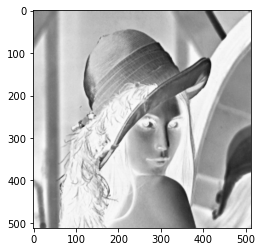

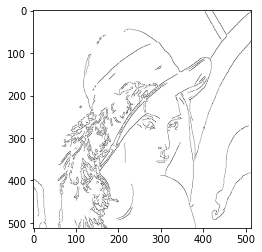

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

lena = cv2.imread('lena.png')
if int(cv2.__version__[0]) >= 4:
    lena_gray = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)
else:
    lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

lena_edges = cv2.Canny(lena_gray, 100, 200)
plt.imshow(lena_gray, cmap="Greys")
plt.show()
plt.imshow(lena_edges, cmap="Greys")
plt.show()

Existem diversas abordagens para cálculo de contornos de imagem: a própria função f(x,y) da imagem, sua derivada primeira f' e sua derivada segunda f''.

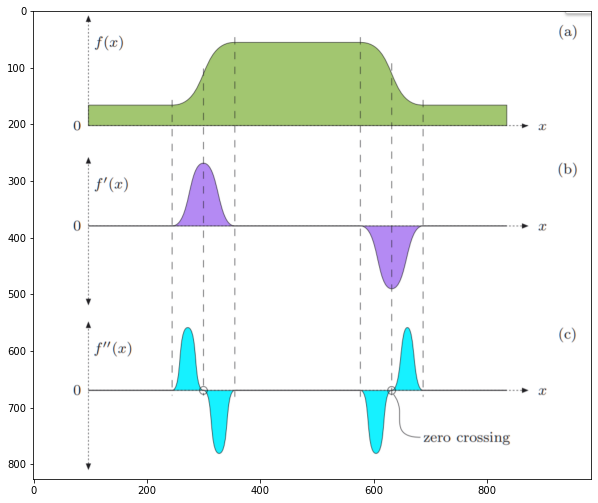

In [3]:
plt.figure(figsize=(10, 10))
edges = cv2.imread('edges.png')
plt.imshow(edges);

## **EXERCÍCIO**

Conforme visto acima, a detecção de contornos depende da variação da função da própria função f(x,y) da imagem, ou de sua derivada primeira ou mesmo de sua derivada segunda.Seu objetivo neste exercício será implementar a deteção de contornos usando somente a variação da função f(x,y):

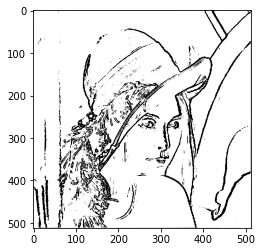

In [4]:
#seu código começa aqui
lena_copy = np.copy(lena_gray)
for i in range(1, lena_gray.shape[0]-1):
    for j in range(1, lena_gray.shape[1]-1):
        if abs(int(lena_gray[i, j-1]) - int(lena_gray[i, j+1])) > 20 or abs(int(lena_gray[i-1, j]) - int(lena_gray[i+1, j])) > 20:
            lena_copy[i, j] = 255
        else:
            lena_copy[i, j] = 0
plt.imshow(lena_copy, cmap="Greys");

A variação da função também pode ser calculada através de um produto de convolução da imagem por um kernel de variação:

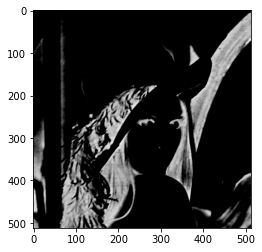

In [5]:
kernel = np.array(([-1, 0, 1],
                   [ 1, 0, 1],
                   [ 1, 0, 1]), dtype="int")

imgf = cv2.filter2D(lena_gray, -1, kernel)  # -1 indica que a profundidade de cores da saída será a mesma da entrada
plt.imshow(imgf, cmap="Greys");

## **DETECÇÃO DE CONTORNOS COM A PRIMEIRA DERIVADA**

O Filtro de Sobel aproxima o gradiente (derivada primeira) da função f(x,y), obtendo dois filtros de detecção de contornos: um para horizontal e outro para vertical.


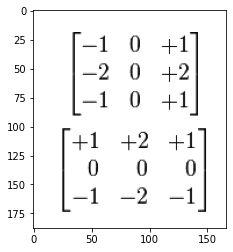

In [6]:
sobel = cv2.imread('sobel.png')
plt.imshow(sobel);

Para aplicar estes dois filtros, usamos as seguintes funções em OpenCV:

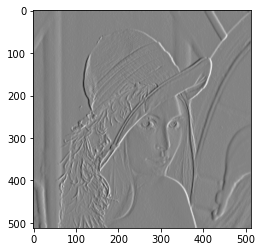

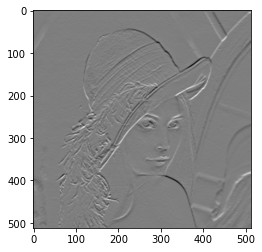

In [14]:
sobelx = cv2.Sobel(lena_gray, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(lena_gray, cv2.CV_64F, 0, 1)
plt.imshow(sobelx, cmap="Greys")
plt.show()
plt.imshow(sobely, cmap="Greys")
plt.show()

## **EXERCÍCIO**

Aplique os filtros de Sobel utilizando o operador de convolução da OpenCV:

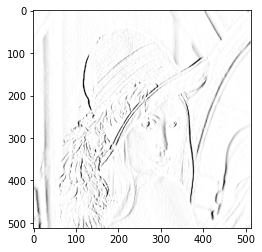

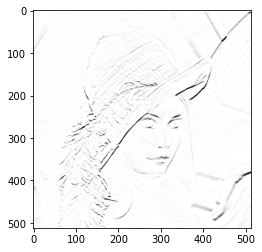

In [9]:
kernel_sobel1 = np.array(([-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]), dtype="int")

kernel_sobel2 = np.array(([ 1, 2, 1],
                          [ 0, 0, 0],
                          [-1,-2,-1]), dtype="int")

lena_sobel1 = cv2.filter2D(lena_gray, -1, kernel_sobel1)
lena_sobel2 = cv2.filter2D(lena_gray, -1, kernel_sobel2)

plt.imshow(lena_sobel1, cmap="Greys");
plt.show()
plt.imshow(lena_sobel2, cmap="Greys");
plt.show()

## **DETECÇÃO DE CONTORNOS COM O FILTRO DE CANNY**

O Filtro de Canny oferece uma maneira alternativa de uso do gradiente da função, sendo um método bastante usado em OpenCV. A Teoria do Filtro de Canny encontra-se abaixo:

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

Vamos aplicá-lo novamente a imagem, como vimos no início da aula:

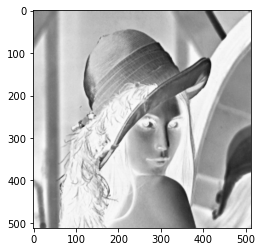

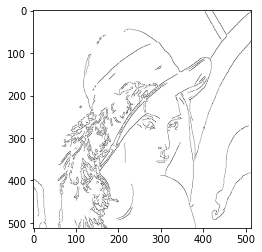

In [29]:
plt.imshow(lena_gray, cmap="Greys")
plt.show()
plt.imshow(lena_edges, cmap="Greys")
plt.show()

## **EXERCÍCIO**

Aplique o Filtro de Canny com diferentes valores de minVal e maxVal, observando as diferenças de aplicação:

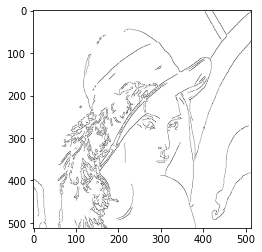

In [28]:
#sua solução começa aqui
lena_canny = cv2.Canny(lena_gray, 100, 200)
plt.imshow(lena_canny, cmap="Greys")
plt.show()

## **DETECÇÃO DE CONTORNOS COM A SEGUNDA DERIVADA**

O Filtro Laplaciano aproxima o laplaciano (derivada segunda) da função f(x,y), obtendo a seguinte matriz de filtro:

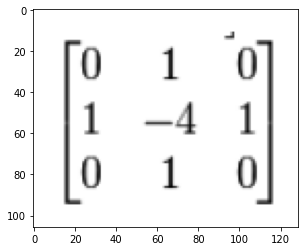

In [31]:
laplacian = cv2.imread('laplacian.png')
plt.imshow(laplacian);

Para aplicar o filtro laplaciano para detecção de bordos, usamos o seguinte código em OpenCV:

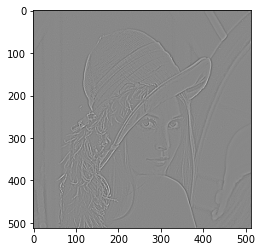

In [33]:
lena_lap = cv2.Laplacian(lena_gray, cv2.CV_64F)
plt.imshow(lena_lap, cmap="Greys");

## **EXERCÍCIO**

Aplique o filtro laplaciano utilizando o operador de convolução da OpenCV:

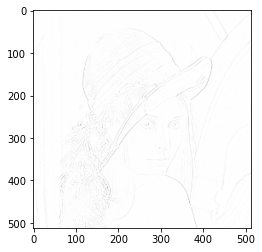

In [16]:
kernel_laplaciano = np.array(([ 0,  1, 0],
                              [ 1, -4, 1],
                              [ 0,  1, 0]), dtype="int")

lena_lapDIY = cv2.filter2D(lena_gray, -1, kernel_laplaciano)
plt.imshow(lena_lapDIY, cmap="Greys")
plt.show()